In [ ]:
# Lab Assignment 2
# Name : Pradeep Kumar Gupta
# Regno: BL.EN.U4CSE21163

In [2]:
import pandas as pd
import numpy as np
import statistics
import sympy as sym
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

In [3]:
# A1. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the following tasks:

# Loading the file 
Thyroid = pd.read_excel('./Data2.xlsx' ,sheet_name='thyroid0387_UCI')

# creating the dataset
Thydf = pd.DataFrame(Thyroid)




# Study each attribute and associated values present. Identify the datatype (nominal etc.) 
# for the attribute.


print(Thydf.dtypes)

# print(Thydf.dtypes.tail(10))

# print(Thydf['Condition'].dtypes)



Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [4]:
# For categorical attributes, identify the encoding scheme to be employed. (Guidance: 
# employ label encoding for ordinal variables while One-Hot encoding may be employed 
# for nominal variables)


nominal_variables = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                     'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                     'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary','psych','TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured','TBG measured',
                     'referral source', 'Condition']


# one hot encoding for nominal variables
one_hot_encoded_data = pd.get_dummies(Thyroid, columns=nominal_variables)
print(one_hot_encoded_data.head())


   Record ID  age  TSH   T3  TT4 T4U FTI TBG  sex_?  sex_F  ...  Condition_M  \
0  840801013   29  0.3    ?    ?   ?   ?   ?  False   True  ...        False   
1  840801014   29  1.6  1.9  128   ?   ?   ?  False   True  ...        False   
2  840801042   41    ?    ?    ?   ?   ?  11  False   True  ...        False   
3  840803046   36    ?    ?    ?   ?   ?  26  False   True  ...        False   
4  840803047   32    ?    ?    ?   ?   ?  36  False   True  ...        False   

   Condition_MI  Condition_MK  Condition_N  Condition_NO CONDITION  \
0         False         False        False                    True   
1         False         False        False                    True   
2         False         False        False                    True   
3         False         False        False                    True   
4         False         False        False                   False   

   Condition_O  Condition_P  Condition_Q  Condition_R  Condition_S  
0        False        False  

In [5]:
# Label encoding for ordinal Variable
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
Label_encoder = LabelEncoder()

ordinal_variables = ['age','TSH','T3','TT4', 'FTI','TBG']


label_Encoded_Data = Label_encoder.fit_transform(ordinal_variables)

print(label_Encoded_Data)


[5 3 1 4 0 2]


In [38]:
#A2. Data Imputation: employ appropriate central tendencies to fill the missing values in the data 
# variables. Employ following guidance.
# 1 Mean may be used when the attribute is numeric with no outliers
# 2 Median may be employed for attributes which are numeric and contain outliers
# 3 Mode may be employed for categorical attributes

# first cleaning the dataset
# replacing the ? and blank spaces with NaN
Thydf.replace(['?',' '], np.nan, inplace=True)


# Handle missing values, for example, by filling with the mean
# Removing the unknow or missing values
Thydf.dropna(subset=['TSH'], inplace=True)
Thydf.dropna(subset=['T3'], inplace=True)
Thydf.dropna(subset=['TT4'], inplace=True)
Thydf.dropna(subset=['FTI'], inplace=True)
Thydf.dropna(subset=['TBG'], inplace=True)


Thydf.fillna(Thydf['TSH'].mean(), inplace=True)
Thydf.fillna(Thydf['T3'].mean(), inplace=True)
Thydf.fillna(Thydf['TT4'].mean(), inplace=True)
Thydf.fillna(Thydf['FTI'].mean(), inplace=True)
Thydf.fillna(Thydf['TBG'].mean(), inplace=True)


# converting the TSH to numeric
Thydf['TSH'] =Thydf['TSH'].astype(int)
Thydf['T3'] =Thydf['T3'].astype(int)
Thydf['TT4'] =Thydf['TT4'].astype(int)
Thydf['FTI'] =Thydf['FTI'].astype(int)
Thydf['TBG'] =Thydf['TBG'].astype(int)




# print(Thydf['TSH'])

# This will save the cleaned dataSet to our folder
Thydf.to_csv('cleaned_Thyroid_dataset.csv', index=False)
print(Thydf.head())


# All the numeric columns
numeric_columns = ['age','TSH','T3','TT4','T4U','FTI','TBG']

column_medians = Thydf[numeric_columns].median()
def replace_outliers(column):
    median = column.median()
    lower_bound = column.quantile(0.25) - 1.5 * (column.quantile(0.75) - column.quantile(0.25))
    upper_bound = column.quantile(0.75) + 1.5 * (column.quantile(0.75) - column.quantile(0.25))
    
    column[column < lower_bound] = median
    column[column > upper_bound] = median
    
    return column

Thydf[numeric_columns] = Thydf[numeric_columns].apply(replace_outliers)


categorical_columns = Thydf.select_dtypes(include=['object']).columns
def replace_outliers_categories(column):
    mode = column.mode().values[0]  
    column[column != mode] = mode  
    return column

Thydf[categorical_columns] = Thydf[categorical_columns].apply(replace_outliers_categories)


     Record ID  age sex on thyroxine query on thyroxine  \
167  840827019  0.0   F            f                  f   

    on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
167                         f    f        f               f              f   

     ... TT4 measured TT4 T4U measured   T4U FTI measured FTI TBG measured  \
167  ...            t   0            t  0.83            t   5            t   

    TBG  referral source Condition  
167  28            other         F  

[1 rows x 31 columns]


In [ ]:
print("Range of age is :",max(Thydf['age'])-min(Thydf['age']))
print("Range of TSH is :",max(Thydf['TSH'])-min(Thydf['TSH']))
print("Range of T3 is :",max(Thydf['T3'])-min(Thydf['T3']))
print("Range of TT4 is :",max(Thydf['TT4'])-min(Thydf['TT4']))
print("Range of FTI is :",max(Thydf['FTI'])-min(Thydf['FTI']))
print("Range of TBG is :",max(Thydf['TBG'])-min(Thydf['TBG']))

Range of age is : 96
Range of TSH is : 430
Range of T3 is : 8
Range of TT4 is : 356
Range of FTI is : 647
Range of TBG is : 22


Empty DataFrame
Columns: [Record ID, age, sex, on thyroxine, query on thyroxine, on antithyroid medication, sick, pregnant, thyroid surgery, I131 treatment, query hypothyroid, query hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH measured, TSH, T3 measured, T3, TT4 measured, TT4, T4U measured, T4U, FTI measured, FTI, TBG measured, TBG, referral source, Condition]
Index: []

[0 rows x 31 columns]


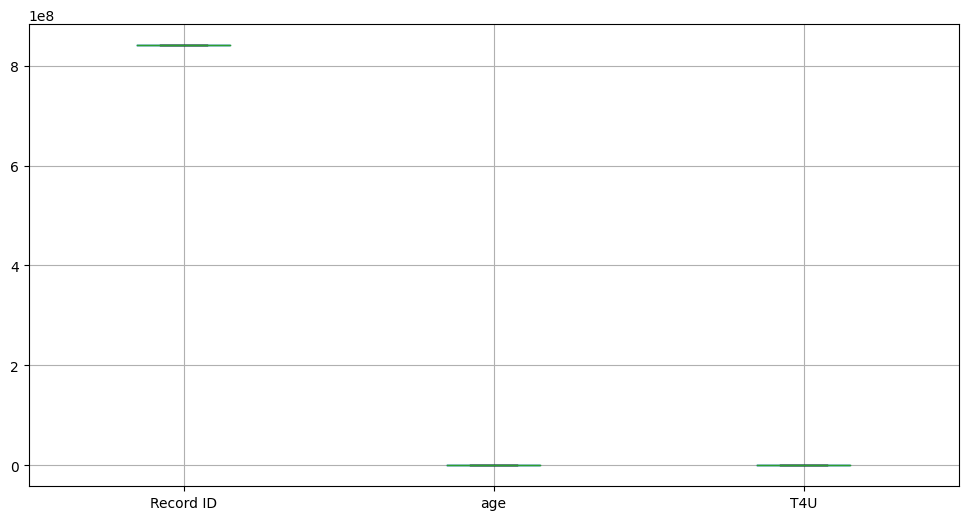

In [7]:
# Study presence of outliers in data.

# To Detect Outliers: we can use statistical methods like the IQR (Interquartile Range) or Z-score to detect outliers. The IQR method is commonly used to identify outliers as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles, respectively. The Z-score method identifies values that are significantly far from the mean.

# selecting the numeric columns by assuming they are numeric
numeric_columns = Thydf.select_dtypes(include=['float64', 'int64'])

# Now visualizing the data using box plots
numeric_columns.boxplot(figsize=(12, 6))

# This code will create box plots for all numeric columns in your dataset, allowing us to visually identify potential outliers. we can further investigate outliers by calculating summary statistics and using the IQR or Z-score methods as mentioned earlier.

# Now Identifying the outliers using the IQR method
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3-Q1

# Define the lower and uppper bound for outliers
lower_bound = Q1 -1.5*IQR
upper_bound = Q3 + 1.5*IQR


# find the outliers in each columns
outliers = ((numeric_columns <lower_bound) | (numeric_columns>upper_bound)).any(axis=1)

# select and print the rows with outliers
outlier_row = Thydf[outliers]
print(outlier_row)

In [8]:
#  For numeric variables, calculate the mean and variance (or standard deviation).

print("Mean of age is :",Thydf['age'].mean(),"and Variance is :",Thydf['age'].var())

print("Mean of TSH is :",Thydf['TSH'].mean(),"and Variance is :",Thydf['TSH'].var())

print("Mean of T3 is :",Thydf['T3'].mean(),"and Variance is :",Thydf['T3'].var())

print("Mean of TT4 is :",Thydf['TT4'].mean(),"and Variance is :",Thydf['TT4'].var())

print("Mean of FTI is :",Thydf['FTI'].mean(),"and Variance is :",Thydf['FTI'].var())

print("Mean of TBG is :",Thydf['TBG'].mean(),"and Variance is :",Thydf['TBG'].var())

Mean of age is : 40.0 and Variance is : nan
Mean of TSH is : 70.0 and Variance is : nan
Mean of T3 is : 0.0 and Variance is : nan
Mean of TT4 is : 3.0 and Variance is : nan
Mean of FTI is : 5.0 and Variance is : nan
Mean of TBG is : 28.0 and Variance is : nan


In [9]:
# A3. Data Normalization / Scaling: from the data study, identify the attributes which may need 
# normalization. Employ appropriate normalization techniques to create normalized set of data.

from sklearn.preprocessing import MinMaxScaler
# Now selecting the numeric attributes to normalize 
numeric_attributes = ['age', 'TT4']

# Initalize the min-max scaler
scaler = MinMaxScaler()

# # Apply Min-Max scaling to the selected attributes
Thydf[numeric_attributes] = scaler.fit_transform(Thydf[numeric_attributes])


# Print the normalized DataFrame
print(Thydf)

     Record ID  age sex on thyroxine query on thyroxine  \
167  840827019  0.0   F            f                  f   

    on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
167                         f    f        f               f              f   

     ... TT4 measured  TT4 T4U measured   T4U FTI measured FTI TBG measured  \
167  ...            t  0.0            t  0.83            t   5            t   

    TBG  referral source Condition  
167  28            other         F  

[1 rows x 31 columns]


In [10]:
# A4. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the 
# attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate 
# the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. 
# Use first vector for each document for this. Compare the values for JC and SMC and judge the 
# appropriateness of each of them.
# JC = (f11) / (f01+ f10+ f11)
# SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
# f11= number of attributes where the attribute carries value of 1 in both 
# the vectors





# for above purpose we use cleaned Data
Data = pd.read_csv('./cleaned_Thyroid_dataset.csv')

#Extracting the two observation vectors(i.e. row)
vec1 = Data.iloc[0]
vec2 = Data.iloc[1]

#Creating the Jaccard function for calculation
def jaccard(v1, v2):
    intersection = sum((v1=='t') & (v2=='t'))
    union = sum((v1=='t') | (v2=='t'))
    return intersection/union


#Creating the Simple_Matching function for calculation
def Simple_Matching(v1, v2):
    match = sum(v1==v2)
    total = len(v1)
    return match/total

# calling the function
Jaccard_coff = jaccard(vec1, vec2)
Simple_Matching_coff = Simple_Matching(vec1, vec2)

print(f'Jaccard Cofficient (JC) is :{Jaccard_coff}')
print(f'Simple Matching Coff (SMC) is :{Simple_Matching_coff}')


# comparing the values between the Jaccard and Simple Matching
if(Jaccard_coff > Simple_Matching_coff):
    print('The Jaccard cofficient is more appropriate for measuring Similarity')
elif Simple_Matching_coff > Jaccard_coff:
     print('The Simple Matching cofficient is more appropriate for measuring Similarity')
else:
     print('The Jaccard cofficient and Simple Matching Coff are equally appropriate for measuring Similarity')


Jaccard Cofficient (JC) is :0.7142857142857143
Simple Matching Coff (SMC) is :0.8064516129032258
The Simple Matching cofficient is more appropriate for measuring Similarity


In [29]:
# A5. Cosine Similarity Measure: Now take the complete vectors for these two observations (including 
# all the attributes). Calculate the Cosine similarity between the documents by using the second 
# feature vector for each document.

# for this we have to import norm from numpy.linalg 

from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity

# first we need to select the two vectors for all attributes
newData = ['age','TSH','T3','TT4','T4U','FTI','TBG']
VecArray1 = Data[newData].iloc[0]
VecArray2 = Data[newData].iloc[1]

# converting the vectors into arrays
vec1 = np.array(VecArray1)
vec2 = np.array(VecArray2)
# To see wheather the vectors are printed or not
# print(vec1)
# print(vec2)


cosine = np.dot(vec1,vec2)/(norm(vec1)*norm(vec2))

# Another Method for finding the cosine similarity
# cosine_sin = cosine_similarity(vec1, vec2)

print("Cosine Similarity is :", cosine)
# print("Cosine Similarity is :", cosine_sin)








Cosine Similarity is : 0.9999623929500724


c:\Python311\Lib\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


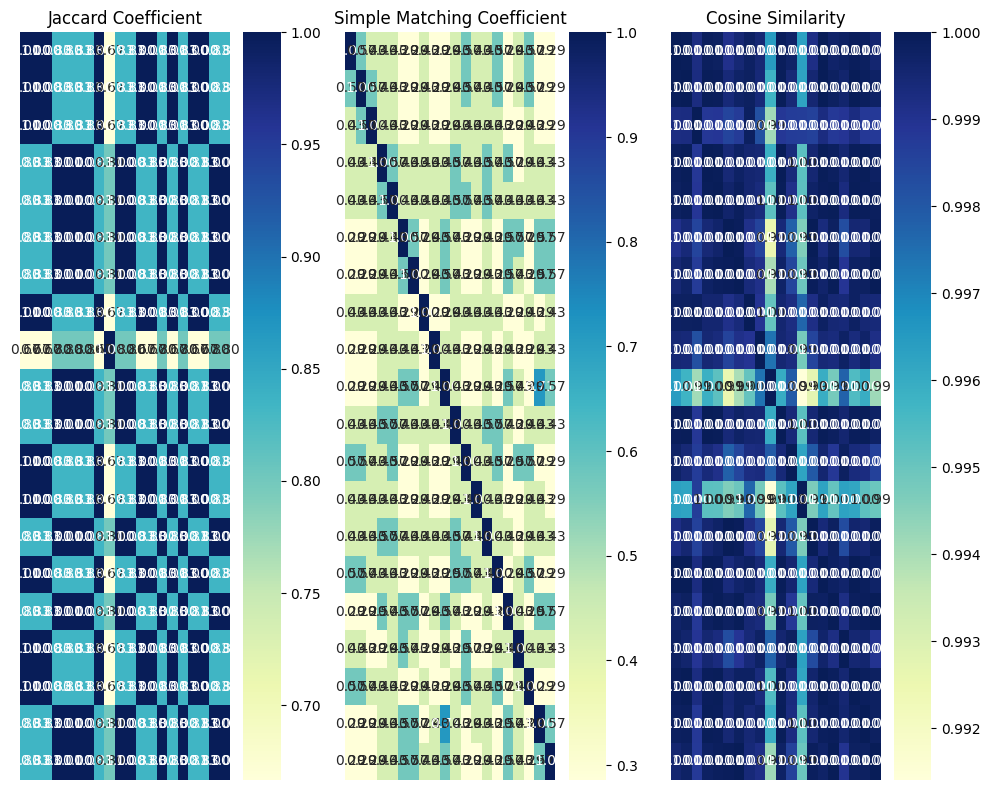

In [32]:
# A6. Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS between 
# the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient calculation as in A4
# & A5. Employ a heatmap plot to visualize the similarities.



import numpy as np
from sklearn.metrics import jaccard_score, pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt



# for these calculation we required 20 instances
newData = ['age','TSH','T3','TT4','T4U','FTI','TBG']
Vector = Data[newData].iloc[:20]
# To check the all the numeric attributes are selected or not
# print(Vector)

# Convert the data to a NumPy array for easy calculations
data_array = np.array(Vector)

# Calculate Jaccard coefficients
jc_similarity = 1 - pairwise_distances(data_array, metric="jaccard")

# Calculate Simple Matching Coefficients
smc_similarity = 1 - pairwise_distances(data_array, metric="hamming")

# Calculate Cosine similarity
cosine_similarity = 1 - pairwise_distances(data_array, metric="cosine")

# Create a heatmap to visualize the similarities
plt.figure(figsize=(10, 8))

# Jaccard Coefficient Heatmap
plt.subplot(131)
sns.heatmap(jc_similarity, annot=True, cmap="YlGnBu", fmt=".2f", xticklabels=False, yticklabels=False)
plt.title("Jaccard Coefficient")

# Simple Matching Coefficient Heatmap
plt.subplot(132)
sns.heatmap(smc_similarity, annot=True, cmap="YlGnBu", fmt=".2f", xticklabels=False, yticklabels=False)
plt.title("Simple Matching Coefficient")

# Cosine Similarity Heatmap
plt.subplot(133)
sns.heatmap(cosine_similarity, annot=True, cmap="YlGnBu", fmt=".2f", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity")

plt.tight_layout()
plt.show()




